In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

In [ ]:
# This is needed since the notebook is stored in the object_detection folder.
import sys
import os
#HomePath = os.path.expanduser('~')
HomePath = '/content/drive/MyDrive/TensorFlow/'
model_path = os.path.join(HomePath, 'models', 'research')
slim_path = os.path.join(HomePath, 'models', 'research', 'slim')
object_detection_path = os.path.join(HomePath, 'models', 'research', 'object_detection')

print(model_path)
sys.path.append(model_path)
sys.path.append(slim_path)
sys.path.append(object_detection_path)

/content/drive/MyDrive/TensorFlow/models/research


In [ ]:
from utils import label_map_util
from utils import visualization_utils as vis_util

In [ ]:
# What model to download.
Model_dir = 'trained-inference-graphs'
MODEL_NAME = 'output_inference_graph_mobile.pb'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
#PATH_TO_CKPT = os.path.join(HomePath, 'Documents', 'Face-Mask-Type-Detector', 'workspace', Model_dir, MODEL_NAME, 'frozen_inference_graph.pb')
PATH_TO_CKPT = os.path.join(HomePath, 'workspace', Model_dir, MODEL_NAME, 'frozen_inference_graph.pb')


# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join(HomePath,'workspace', 'annotations', 'label_map.pbtxt')

NUM_CLASSES = 4

In [ ]:
# Load a (frozen) Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.compat.v1.GraphDef()
  with tf.compat.v2.io.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [ ]:
# Loading label map
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [ ]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [ ]:
import cv2
cap = cv2.imread("/content/drive/MyDrive/TensorFlow/workspace/test_images/image9.jpg", cv2.IMREAD_COLOR)

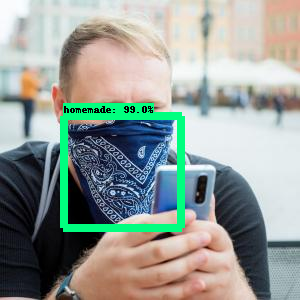

In [ ]:
from google.colab.patches import cv2_imshow
with detection_graph.as_default():
  with tf.compat.v1.Session(graph=detection_graph) as sess:
    image_np = cap
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    scores = detection_graph.get_tensor_by_name('detection_scores:0')
    classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    # Actual detection.
    (boxes, scores, classes, num_detections) = sess.run(
        [boxes, scores, classes, num_detections],
        feed_dict={image_tensor: image_np_expanded})
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        np.squeeze(boxes),
        np.squeeze(classes).astype(np.int32),
        np.squeeze(scores),
        category_index,
        use_normalized_coordinates=True,
        line_thickness=8)

    cv2_imshow(image_np)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
